# Overview for symmetric taus param set
This params set deals with the effect of $\tau_1$/$\tau_2$ and $\gamma$ on the acfs and ccfs.

First the acf/ccfs is analyzed when both $\tau$ parameters are the same.
Later it is analyzed what happens if they are different

In [1]:
import os
print(os.getcwd())
from main_multiple_runs import R, T, t_interval, T_cycles, NoiseType
from plotting.plotting import plot_with_percentiles, plot_fwahh, fwahh, plt_correlation
from pathlib import Path
from file_handling import load_ensemble
import matplotlib.pyplot as plt
import numpy as np

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

base_path = '../results/params_symmetric_increasing_taus_1000_500_0'
img_path = base_path + '/.images/'
os.makedirs(img_path, exist_ok=True)

results, steps, steps_tau, _, ensembles, R = load_ensemble(Path(base_path))
steps_len = len(steps)
t_total = results[0]['ensemble']['ou1_median'].index[-1]

to_i = lambda t: t / t_total * R
to_t = lambda t: t / R * t_total

get_acf1_median = lambda r: r['acf_ensemble']['acf_ou1_median']
get_acf2_median = lambda r: r['acf_ensemble']['acf_ou2_median']
get_ccf_median = lambda r: r['ccf_ensemble']['ccf_median']
get_acf1_lag_at = lambda r: get_acf1_median(r)[t_lag_comparisson]
get_acf2_lag_at = lambda r: get_acf2_median(r)[t_lag_comparisson]

t_lag_comparisson = get_acf1_median(results[0]).index[round(len(get_acf1_median(results[0]).index) * 0.2)]

def save(name):
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.savefig(img_path + name, format='pdf')

/Users/tts/workspace/oldenburg/praktikum_jan_freund/code/src


# OU Sample
A sample run from both Ornstein Uhlenbeck processes for debug purposes

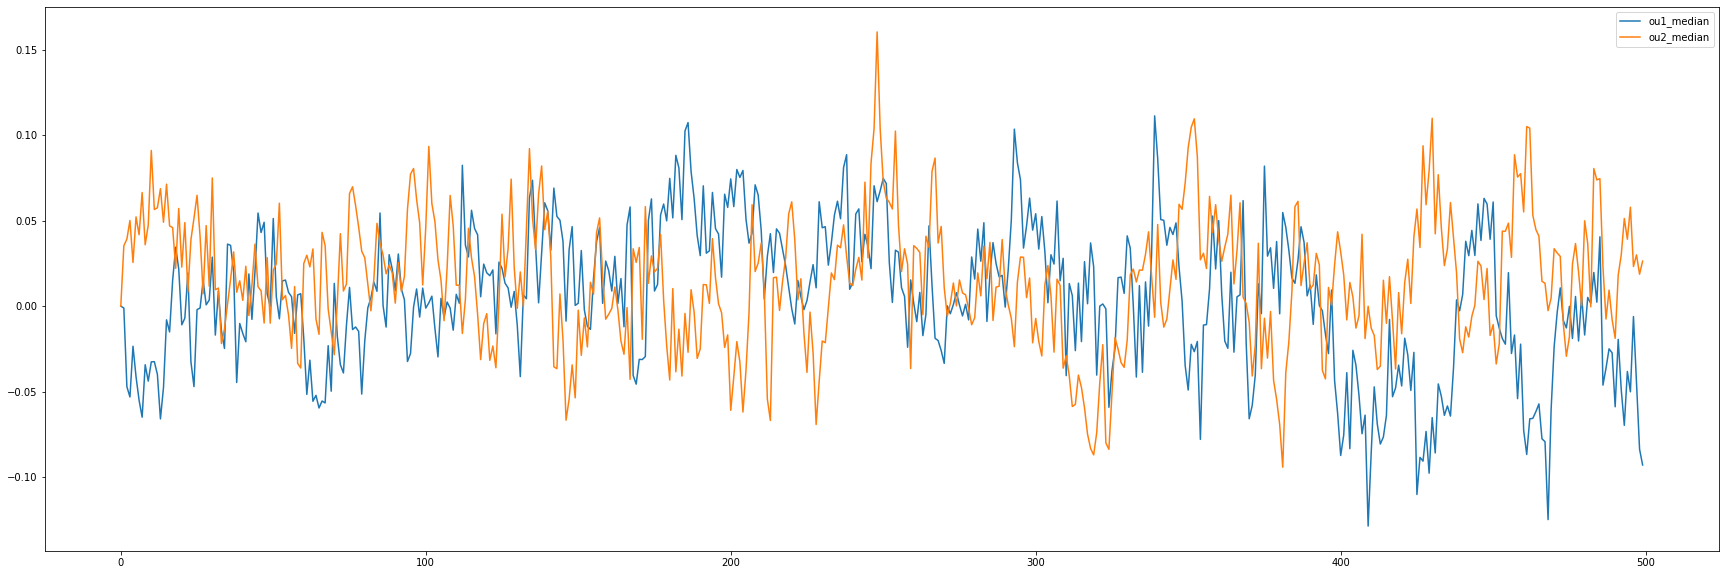

In [2]:
results[2]['ensemble'].filter(like='median').filter(like='ou').plot()

# ACF
Ensemble of autocorrelation functions for each parameter set where $\tau_1 = \tau_2$.

$e$ is 0.5

## White Noise

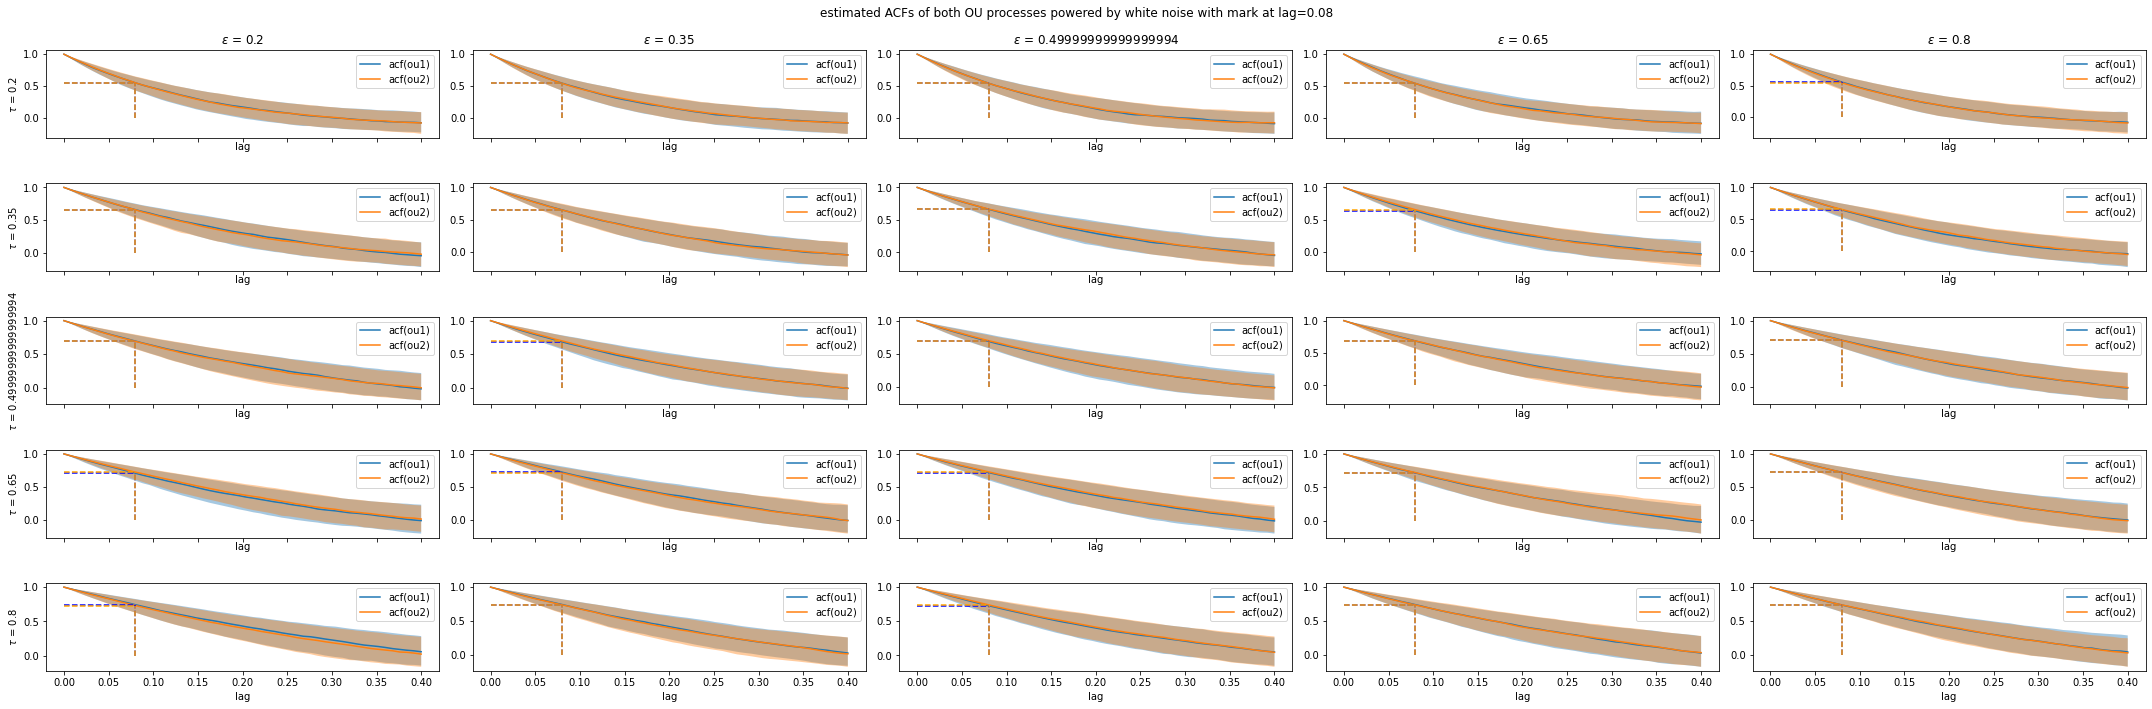

In [3]:
from plotting.plotting import plt_acf
plt_acf(steps, steps_tau, steps_len, results, lambda tau,e,p: p['noiseType']['type'] == NoiseType.WHITE and p['tau1'] == tau and p['e'] == e)
plt.suptitle(f'estimated ACFs of both OU processes powered by white noise with mark at lag={t_lag_comparisson:.1}')
save('/white_noise_acf.pdf')

## Red Noise

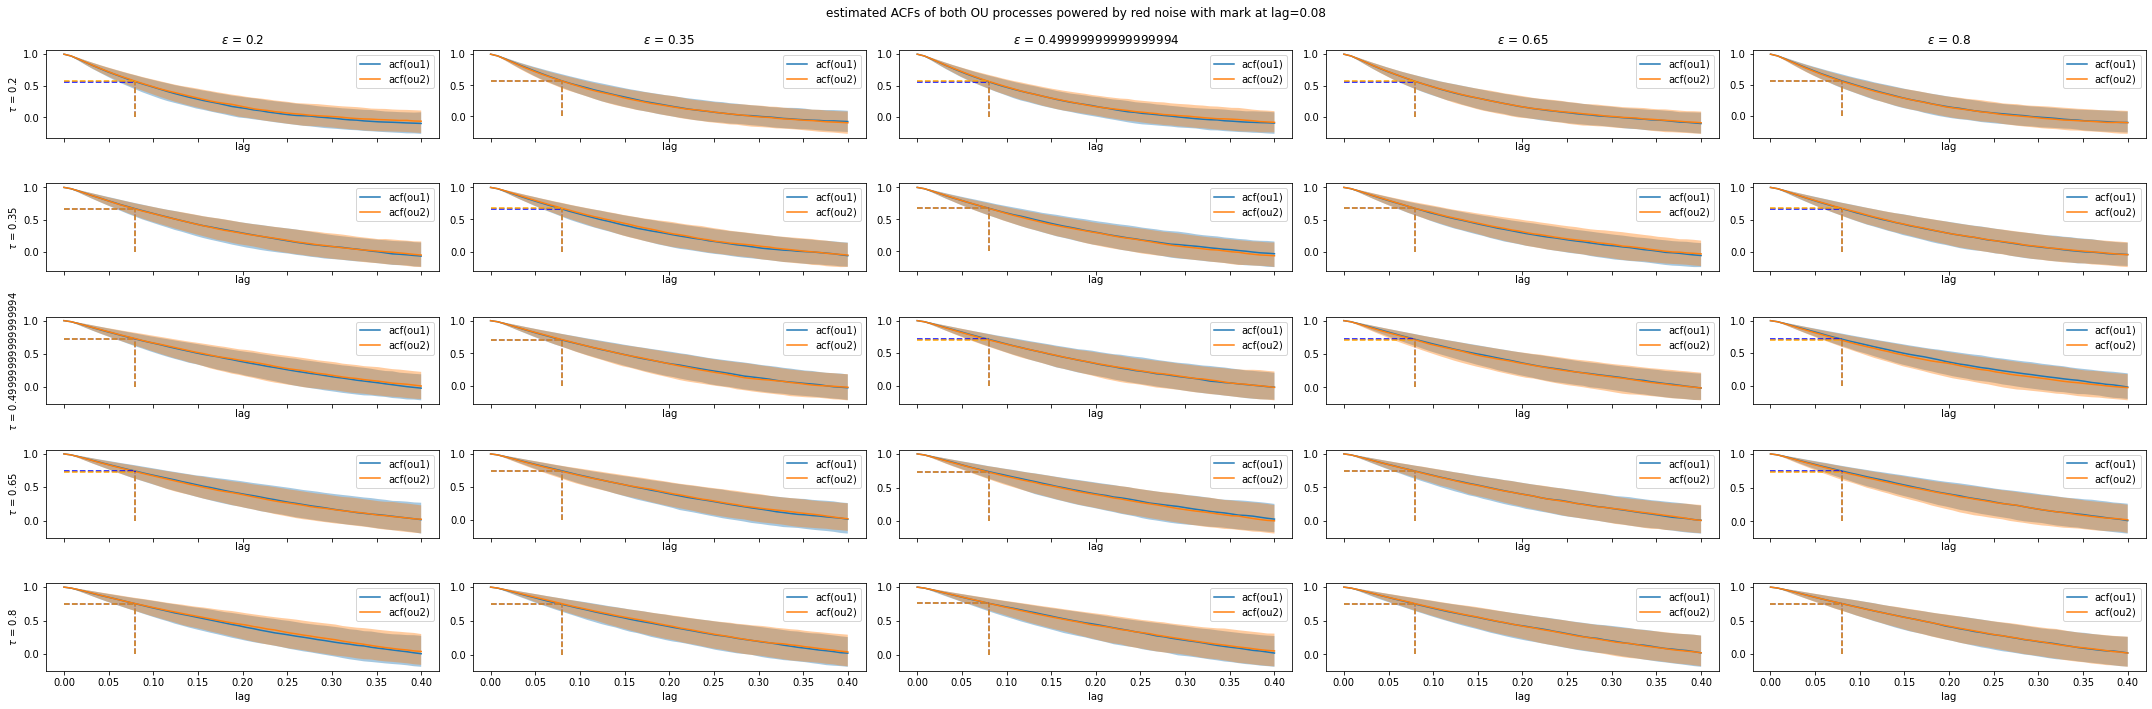

In [4]:
from plotting.plotting import plt_acf
plt_acf(steps, steps_tau, steps_len, results, lambda tau,e,p: p['noiseType']['type'] == NoiseType.RED and p['tau1'] == tau and p['e'] == e)
plt.suptitle(f'estimated ACFs of both OU processes powered by red noise with mark at lag={t_lag_comparisson:.1}')
save('/red_noise_acf.pdf')


# CCF
Ensemble of cross correlation functions for each parameter set.
The red line indicates the full width at half height of the peak.

## White Noise

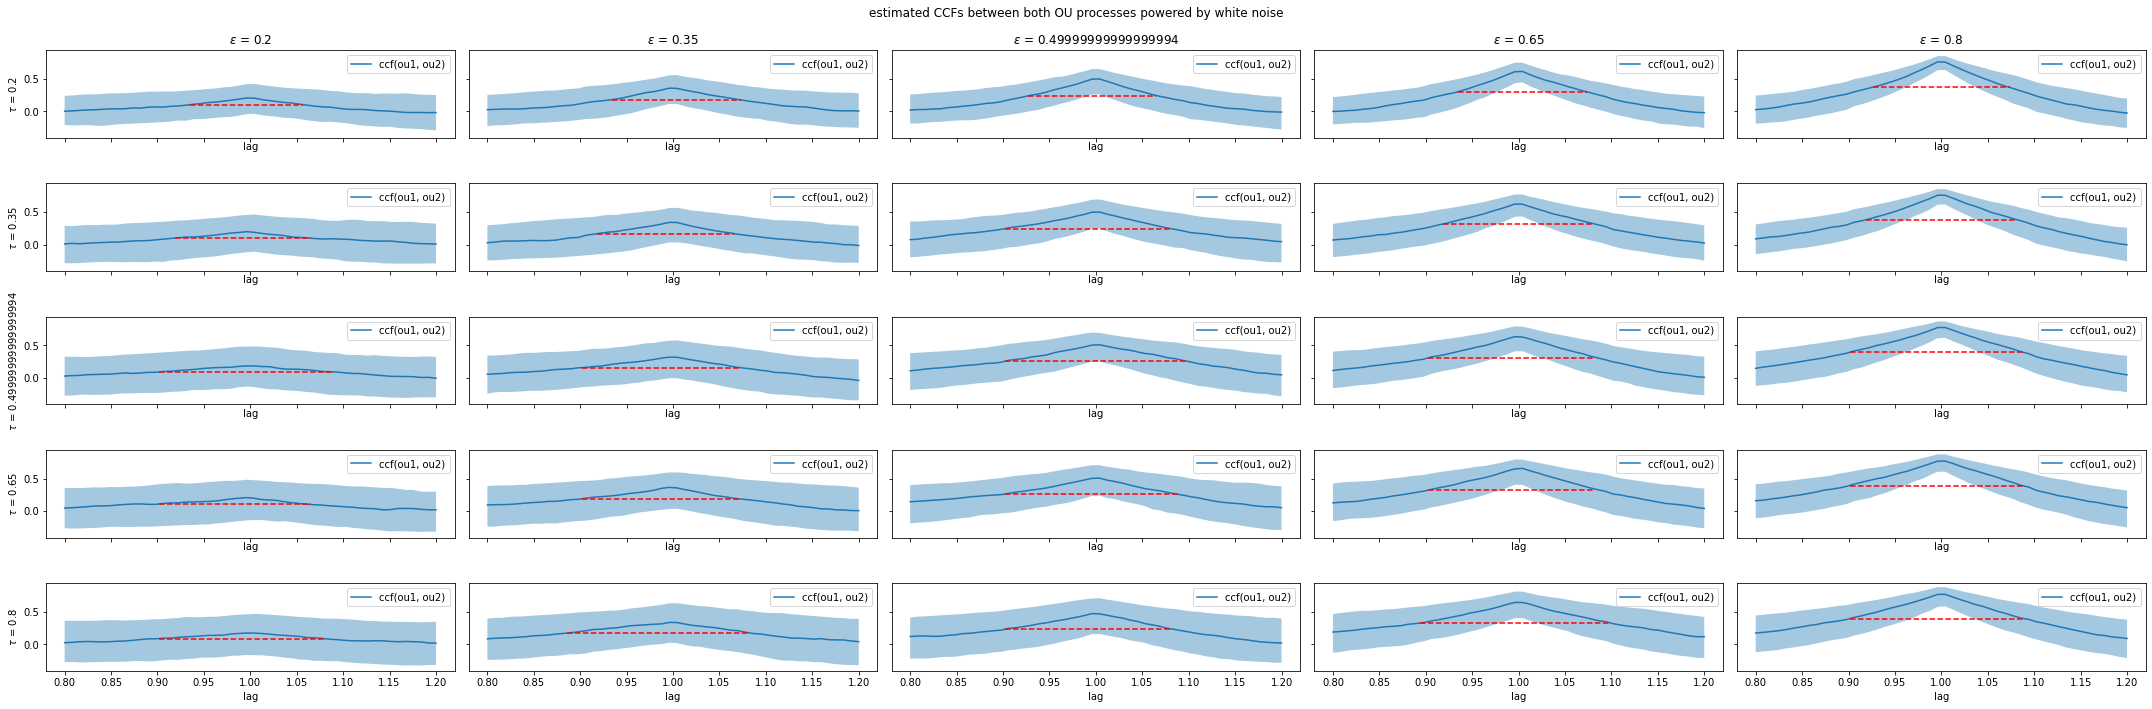

In [5]:
fig, axs = plt.subplots(steps_len - 2, steps_len - 2, sharey=True, sharex=True)
labels = ['ou1', 'ou2']
xlabel = 'lag'
ylabel = 'acf'

for i, tau in enumerate(steps[1:-1]):
    for j, e in enumerate(steps[1:-1]):
        res = [res for res in results if res['p']['noiseType']['type'] == NoiseType.WHITE and res['p']['tau1'] == tau and res['p']['e'] == e][0]
        median = res['ccf_ensemble']['ccf_median']
        
        plot_with_percentiles(res['ccf_ensemble'], axs[i][j], 'ccf(ou1, ou2)', prefix='ccf_')
        
        axs[i][j].set_xlabel(xlabel)
        
        plot_fwahh(axs[i][j], median)
        
        if i == 0:
            axs[i][j].set_title(f"$\epsilon$ = {e}")
        if j == 0:
#             fig.annotate(f"$\tau$ = {tau}", [0, 1])
            axs[i][j].set_ylabel(f"$\\tau$ = {tau}")
        
fig.suptitle('estimated CCFs between both OU processes powered by white noise')
save('/white_noise_ccf.pdf')
# fig.tight_layout()

## Red Noise

IndexError: index 3 is out of bounds for axis 0 with size 3

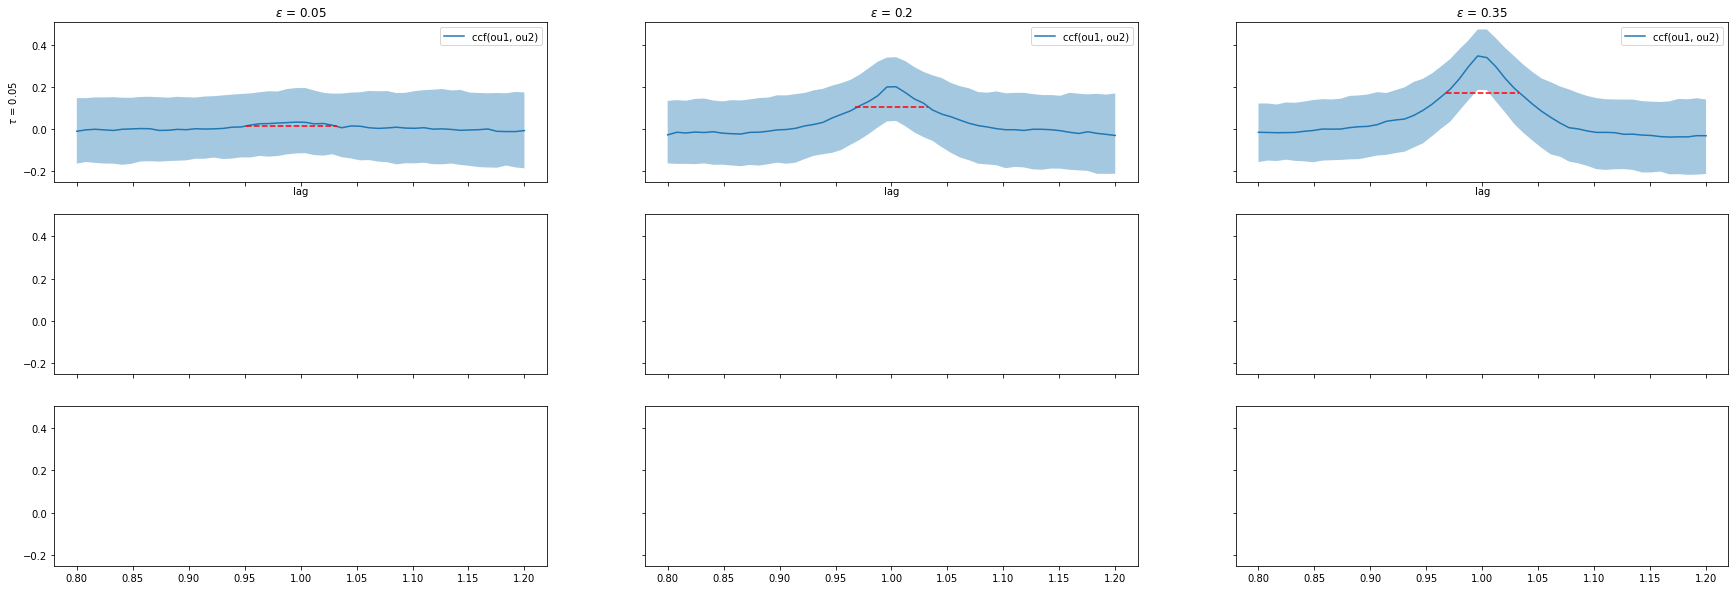

In [6]:
fig, axs = plt.subplots(3, 3, sharey=True, sharex=True)
labels = ['ou1', 'ou2']
xlabel = 'lag'
ylabel = 'acf'

for i, tau in enumerate(steps_tau):
    for j, e in enumerate(steps):
        res = [res for res in results if res['p']['noiseType']['type'] == NoiseType.RED and res['p']['tau1'] == tau and res['p']['e'] == e][0]
        median = res['ccf_ensemble']['ccf_median']
        
        plot_with_percentiles(res['ccf_ensemble'], axs[i][j], 'ccf(ou1, ou2)', prefix='ccf_')
        
        axs[i][j].set_xlabel(xlabel)
        
        plot_fwahh(axs[i][j], median)
        
        if i == 0:
            axs[i][j].set_title(f"$\epsilon$ = {e}")
        if j == 0:
#             fig.annotate(f"$\tau$ = {tau}", [0, 1])
            axs[i][j].set_ylabel(f"$\\tau$ = {tau}")
        
fig.suptitle('estimated CCFs between both OU processes powered by red noise')
save('/red_noise_ccf.pdf')
# fig.tight_layout()

# Correlation Analysis

The peak height seems to correlate with $\epsilon$

The width with tau

### ACF Correlation



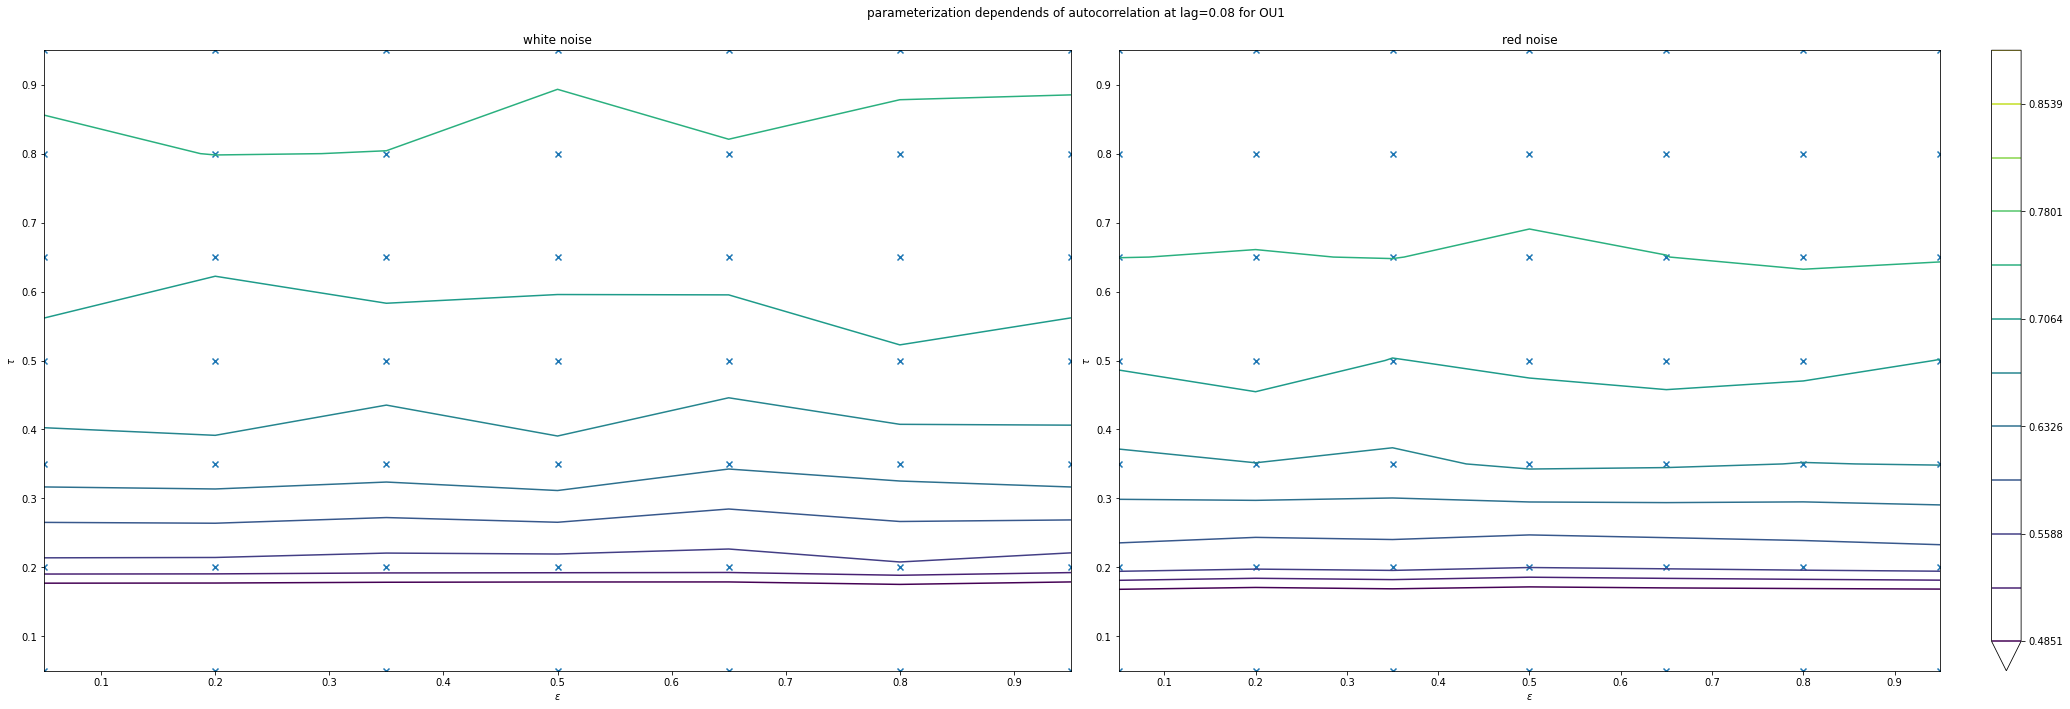

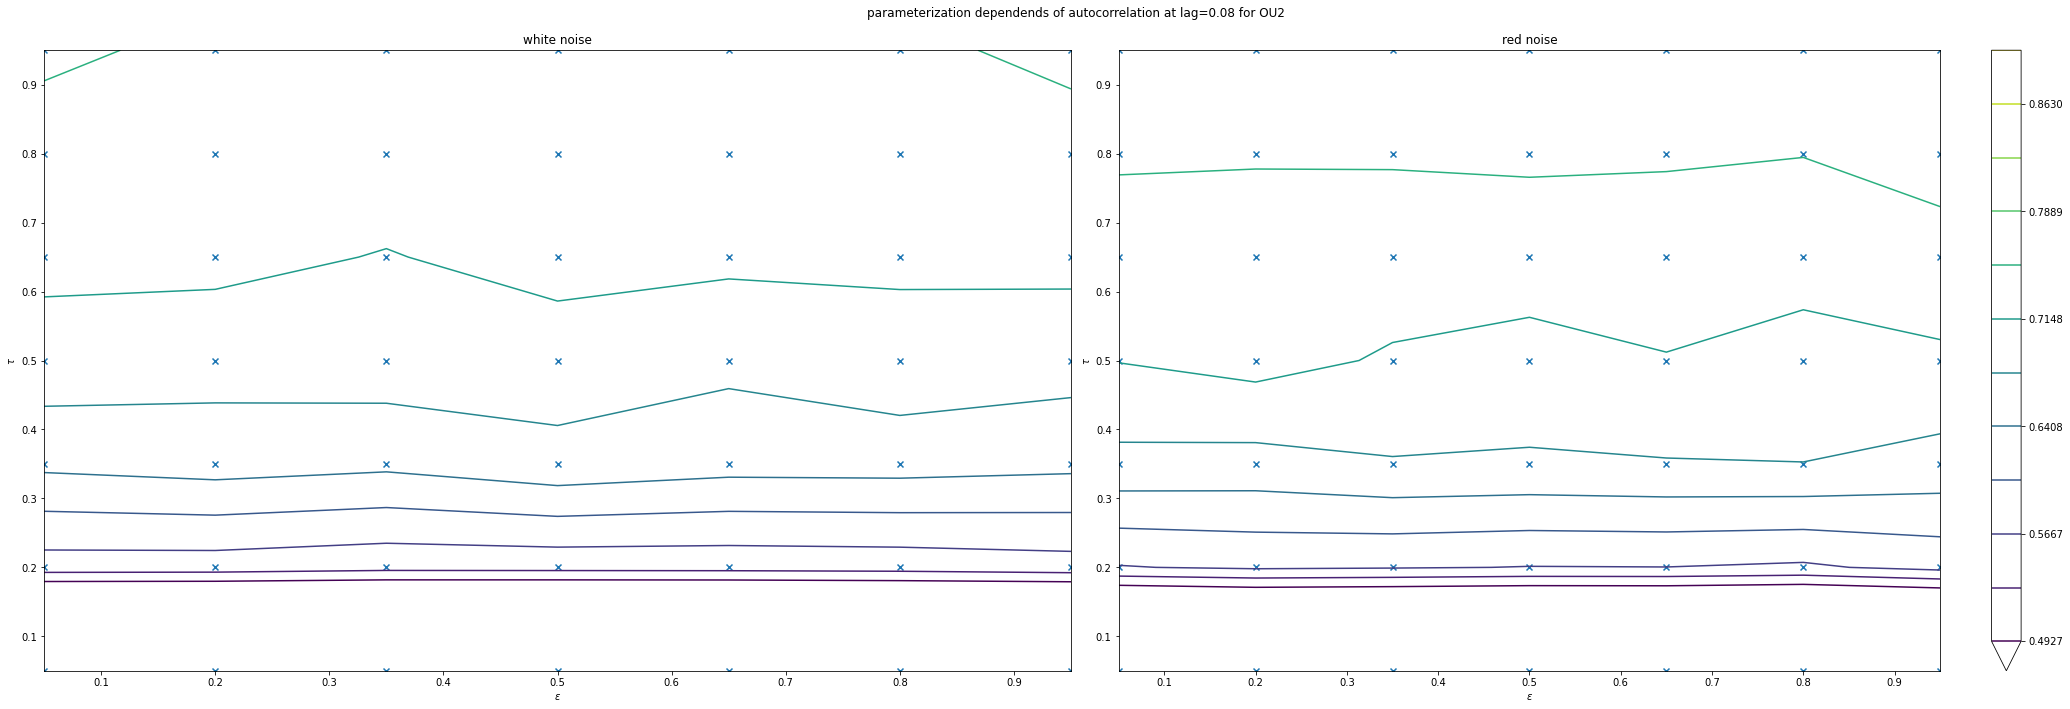

In [7]:
plt_correlation(results, steps, steps_tau,  get_acf1_lag_at, title=f'parameterization dependends of autocorrelation at lag={t_lag_comparisson:.2} for OU1')
save('/acf_correlation_ou1.pdf')

plt_correlation(results, steps, steps_tau,  get_acf2_lag_at, title=f'parameterization dependends of autocorrelation at lag={t_lag_comparisson:.2} for OU2')
save('/acf_correlation_ou2.pdf')

### CCF Correlation

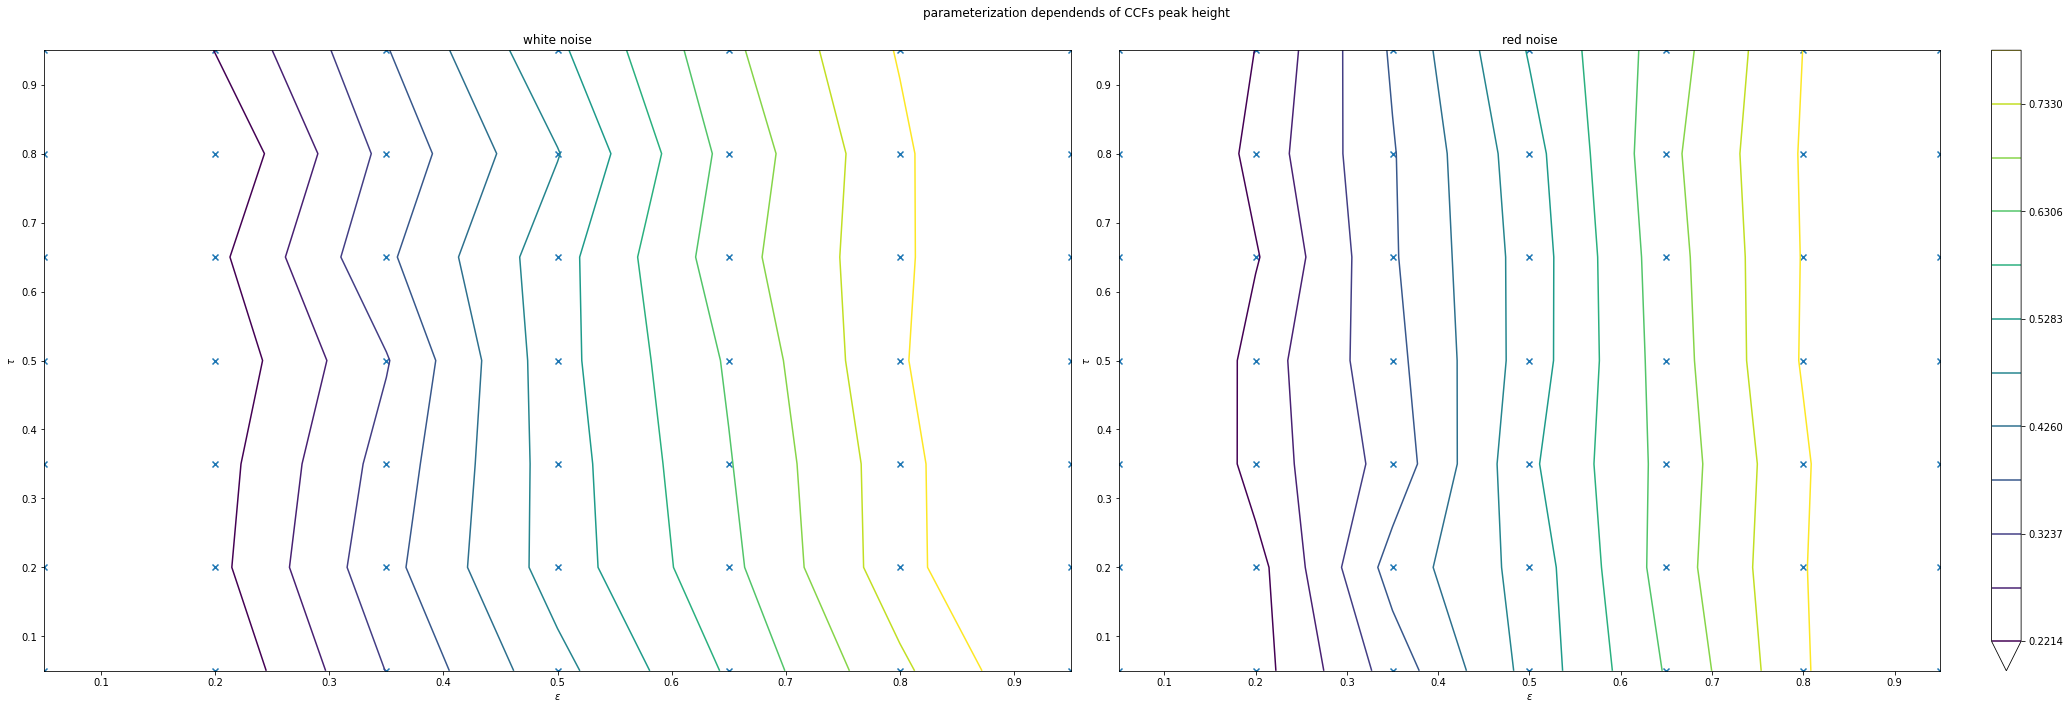

In [8]:
get_ccf_median = lambda r: r['ccf_ensemble']['ccf_median']
plt_correlation(results, steps, steps_tau, lambda r: np.max(get_ccf_median(r)), title=f'parameterization dependends of CCFs peak height')
save('/ccf_peak_height_correllation.pdf')
# Correlation between tau and ccf peak

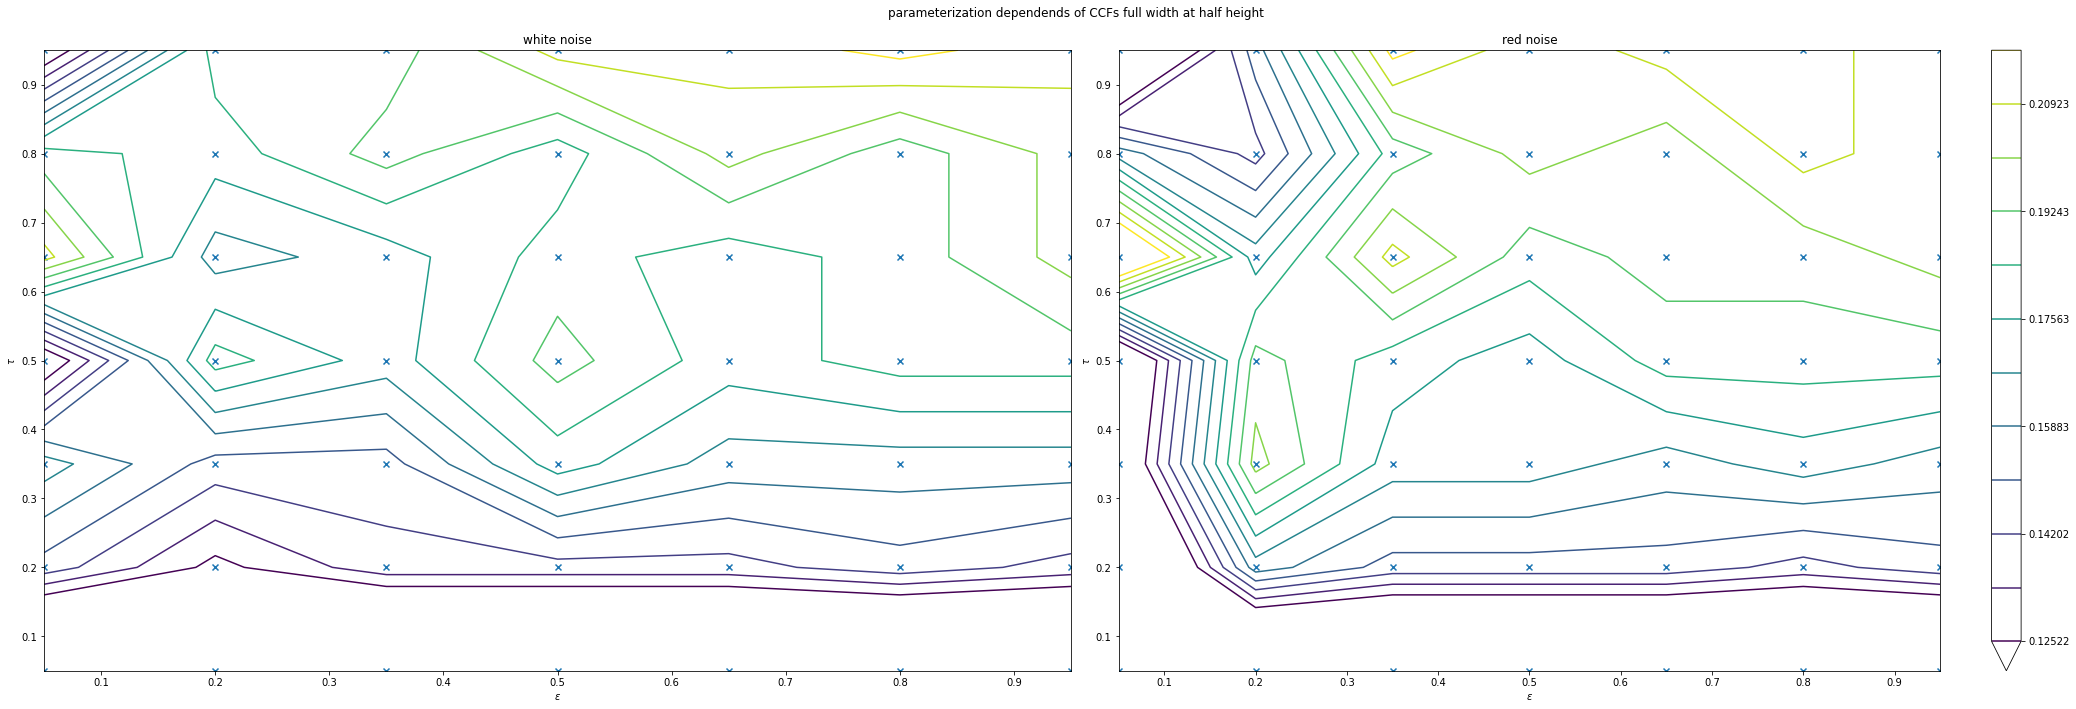

In [9]:
plt_correlation(results, steps, steps_tau, lambda r: fwahh(get_ccf_median(r))[2], title=f'parameterization dependends of CCFs full width at half height')
#plt_correlation(results, getTau1, getE, getGamma, lambda r: fwahh(get_ccf_median(r))[2], xlabel='$\tau$', ylabel='$fwahh(ccf_{median})$')
#Correlation between epsilon and ccf of fwahh
save('/ccf_fwahh_correlation.pdf')
pass

### Contour Debugging

In [ ]:
yFn =  lambda r: fwahh(get_ccf_median(r))[2]
z_white = [[yFn([r for r in results if r['p']['noiseType']['type'] == NoiseType.WHITE
                            and r['p']['e'] == e
                            and r['p']['tau1'] == tau
                            ][0]) for e in steps] for tau in steps_tau]

z_red = [[yFn([r for r in results if r['p']['noiseType']['type'] == NoiseType.RED
                          and r['p']['e'] == e
                          and r['p']['tau1'] == tau
                          and r['p']['noiseType']['gamma1'] == 0.5
                          ][0]) for e in steps] for tau in steps_tau]

fig, axs = plt.subplots(1, 2)
xx, yy = np.meshgrid(steps, steps_tau)

med = np.median(np.array(z_white))
std = np.std(np.array(z_white))
vmin = med-std*1
vmax = med+std*1
print(vmin, vmax)

levels=np.linspace(vmin, vmax, 12)
map = axs[0].contour(steps, steps_tau, z_white, levels=levels)
axs[0].scatter([e for e in steps for tau in steps_tau], [tau for e in steps for tau in steps_tau], marker='x')
axs[0].set(title='white noise', xlabel='$\epsilon$', ylabel='$\\tau$')

xx, yy = np.meshgrid(steps, steps_tau)
map = axs[1].contour(steps, steps_tau, z_red, levels=levels, extend='min')
axs[1].scatter([e for e in steps for tau in steps_tau], [tau for e in steps for tau in steps_tau], marker='x')
axs[1].set(title='red noise', xlabel='$\epsilon$', ylabel='$\\tau$')
plt.colorbar(map)
print(map)

In [ ]:
med = np.median(np.array(z_white))
std = np.std(np.array(z_white))
print(med-std*3)
print(med+std*3)

# Full Width at half height debugging

In [ ]:
from plotting.plotting import fwahh
print(len(results))
median = get_ccf_median(results[10])
ax = median.plot(style='x')

[i_l, i_r], [x_l, x_r], width, hh = fwahh(median)

h_l = median[i_l]
h_r = median[i_r]

i_l_i = (median.index[max(0, x_l + (-1 if h_l > h_r else 1))] + median.index[x_l]) / 2
i_r_i = (median.index[x_r + (-1 if h_l > h_r else 1)] + median.index[x_r]) / 2
h_l_i = (median.iloc[max(0, x_l + (-1 if h_l > h_r else 1))] + median.iloc[x_l]) / 2
h_r_i = (median.iloc[x_r + (-1 if h_l > h_r else 1)] + median.iloc[x_r]) / 2

# ax.plot(x_peak_index, height, 'ro')
height = (h_l + h_r) / 2
ax.plot([i_l_i, i_r_i], [(h_l_i + h_r_i) / 2, (h_l_i + h_r_i) / 2])
ax.plot(i_l_i, h_l_i, 'yo')

x_debug = x_r+(-1 if h_l > h_r else 1)
ax.plot(median.index[x_debug], median.iloc[x_debug], 'yo')
ax.plot(500, hh, 'yo')

ax.plot(i_l_i, h_l_i, 'go')
ax.plot(i_r_i, h_r_i, 'go')
ax.plot(i_l, median[i_l], 'ro')
ax.plot(i_r, median[i_r], 'ro')